In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [244]:
raw_data1 = pd.read_excel("./Data_Train.xlsx")
raw_data1=raw_data1[~raw_data1['Airline'].str.contains("Trujet")]
test_data = pd.read_excel("./Test_set.xlsx")
raw_data1['source'] = 'train'
test_data['source'] = 'test'

In [245]:
raw_data = pd.concat([raw_data1,test_data],ignore_index=True)

In [246]:
raw_data.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
source                0
dtype: int64

In [247]:
#Break2
raw_data['Date_of_Journey'] = pd.to_datetime(raw_data['Date_of_Journey'])

In [248]:
raw_data['DOJ_Month']=raw_data['Date_of_Journey'].dt.month
raw_data['Date_of_Journey']=pd.to_numeric(raw_data['Date_of_Journey'].dt.day)

In [249]:
raw_data['Airline'].replace({'Multiple carriers Premium economy':'MCPE','Jet Airways Business':'JAB',
                            'Vistara Premium economy':'VPE'},inplace = True)

In [250]:
raw_data['Dep_Time'] = pd.to_datetime(raw_data['Dep_Time'])
raw_data['Arr_time'] = raw_data['Arrival_Time'].str.split(" ",expand = True)[0]
raw_data['Arr_time']=pd.to_datetime(raw_data['Arr_time'])
raw_data['Arr_New_date'] = raw_data['Arrival_Time'].str.split(" ",expand = True)[1]
raw_data['Arr_Month']=raw_data['Arrival_Time'].str.split(" ",expand = True)[2]
raw_data.drop(['Arrival_Time'], inplace=True, axis=1)

In [251]:
raw_data['Weekend']=((pd.DatetimeIndex(raw_data.Date_of_Journey).dayofweek) // 5 == 1).astype(float)

In [252]:
raw_data['hrs_D']=raw_data['Duration'].str.split(" ", expand=True)[0]
raw_data['mins_D']=raw_data['Duration'].str.split(" ", expand=True)[1]
raw_data['hrs_D'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
raw_data['mins_D'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
raw_data['mins_D'].fillna(0, inplace=True)

raw_data["hrs_D"] = pd.to_numeric(raw_data["hrs_D"])
raw_data["mins_D"] = pd.to_numeric(raw_data["mins_D"])

raw_data["hrs_D"]*=60


raw_data.drop(['Duration'], inplace=True, axis=1)
raw_data['Duration'] = raw_data['hrs_D']+raw_data['mins_D']

raw_data.drop(['hrs_D'], inplace=True, axis=1)
raw_data.drop(['mins_D'], inplace=True, axis=1)

In [253]:
raw_data['Total_Stops']=raw_data['Total_Stops'].replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4})

In [254]:
raw_data.drop(['Additional_Info'], inplace=True,axis=1)

In [255]:
raw_data.drop(['Route'], inplace=True,axis=1)

In [256]:
raw_data['Total_Stops'].fillna(1, inplace=True)

In [257]:
raw_data['Arr_New_date'].fillna(0, inplace=True)
raw_data['Arr_Month'].fillna('XXX', inplace=True)

In [258]:
raw_data["Arr_New_date"] = pd.to_numeric(raw_data["Arr_New_date"])


In [259]:
def bin_f(x):
    h = x
    if h < 6:
        return 1
    elif h < 12:
        return 2
    elif h < 18:
        return 3
    else:
        return 4

In [260]:
#BREAK
raw_data['Dep_hour'] = pd.to_numeric(raw_data['Dep_Time'].dt.hour)
raw_data['Dep_hour'] = raw_data['Dep_hour'].apply(bin_f)
raw_data['Arr_hour'] = pd.to_numeric(raw_data['Arr_time'].dt.hour)
raw_data['Arr_hour'] = raw_data['Arr_hour'].apply(bin_f)

raw_data.drop('Dep_Time', inplace=True,axis=1)
raw_data.drop('Arr_time', inplace=True,axis=1)


raw_data['Duration'] = np.log(raw_data['Duration'])
#raw_data['Dep_Time'] = pd.cut(raw_data['Dep_Time'], bins=4)
#raw_data['Arr_time'] = pd.cut(raw_data['Arr_time'], bins=4)


In [261]:
#TAKE 2 TUNING
raw_data['DOJ_Month']=raw_data['DOJ_Month'].astype('str')

raw_data['Weekend'] = raw_data['Weekend'] .astype('bool')

raw_data['Dep_hour']=raw_data['Dep_hour'].astype('str')
raw_data['Arr_hour']=raw_data['Arr_hour'].astype('str')

print(raw_data.dtypes)

Airline             object
Date_of_Journey      int64
Destination         object
Price              float64
Source              object
Total_Stops        float64
source              object
DOJ_Month           object
Arr_New_date         int64
Arr_Month           object
Weekend               bool
Duration           float64
Dep_hour            object
Arr_hour            object
dtype: object


In [262]:
#Divide into test and train:
train = raw_data.loc[raw_data['source']=="train"]
test = raw_data.loc[raw_data['source']=="test"]
train.drop(["source"], inplace=True, axis=1)
test.drop(["source","Price"], inplace=True, axis=1)

/Users/virajdattkohir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/virajdattkohir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [263]:
train['Price'] = np.log(train['Price'])
X = pd.get_dummies(train)

/Users/virajdattkohir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [264]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
import xgboost
import numpy as np
from sklearn.ensemble import RandomForestRegressor
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X.drop(["Price"], axis=1), X['Price'])

In [265]:
def fitmodel(alg,tr_x,tr_y,val_x,val_y):
    alg.fit(tr_x,tr_y)
    print(np.sqrt(mean_squared_error(alg.predict(val_x),val_y)))

In [266]:
reg = xgboost.XGBRegressor()

fitmodel(reg,train_x,train_y,valid_x,valid_y)

0.20606324168456527


In [267]:
Y = pd.get_dummies(test)

In [268]:
sub1 = reg.predict(Y)

In [269]:
#pd.DataFrame(sub1).to_excel("./subimission_01.xlsx")


### SCORE FOR UNTUNED XGB 0.8780744
# RANK 140

In [270]:
rf_reg = RandomForestRegressor()
fitmodel(rf_reg,train_x,train_y,valid_x,valid_y)

0.20122220435460944


In [271]:
sub2 = rf_reg.predict(Y)
sub2 = np.exp(sub2)
pd.DataFrame(sub2).to_excel("./subimission_04.xlsx",index=False)

### SCORE FOR UNTUNED RF 0.9110485
# RANK 99

In [272]:
X.columns

Index(['Date_of_Journey', 'Price', 'Total_Stops', 'Arr_New_date', 'Weekend',
       'Duration', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_JAB', 'Airline_Jet Airways', 'Airline_MCPE',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_VPE',
       'Airline_Vistara', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'DOJ_Month_1',
       'DOJ_Month_12', 'DOJ_Month_3', 'DOJ_Month_4', 'DOJ_Month_5',
       'DOJ_Month_6', 'DOJ_Month_9', 'Arr_Month_Apr', 'Arr_Month_Jun',
       'Arr_Month_Mar', 'Arr_Month_May', 'Arr_Month_XXX', 'Dep_hour_1',
       'Dep_hour_2', 'Dep_hour_3', 'Dep_hour_4', 'Arr_hour_1', 'Arr_hour_2',
       'Arr_hour_3', 'Arr_hour_4'],
      dtype='object')

In [273]:
raw_data['Duration'].describe()

count    13353.000000
mean         6.101399
std          0.906268
min          4.317488
25%          5.164786
50%          6.253829
75%          6.835185
max          7.958577
Name: Duration, dtype: float64

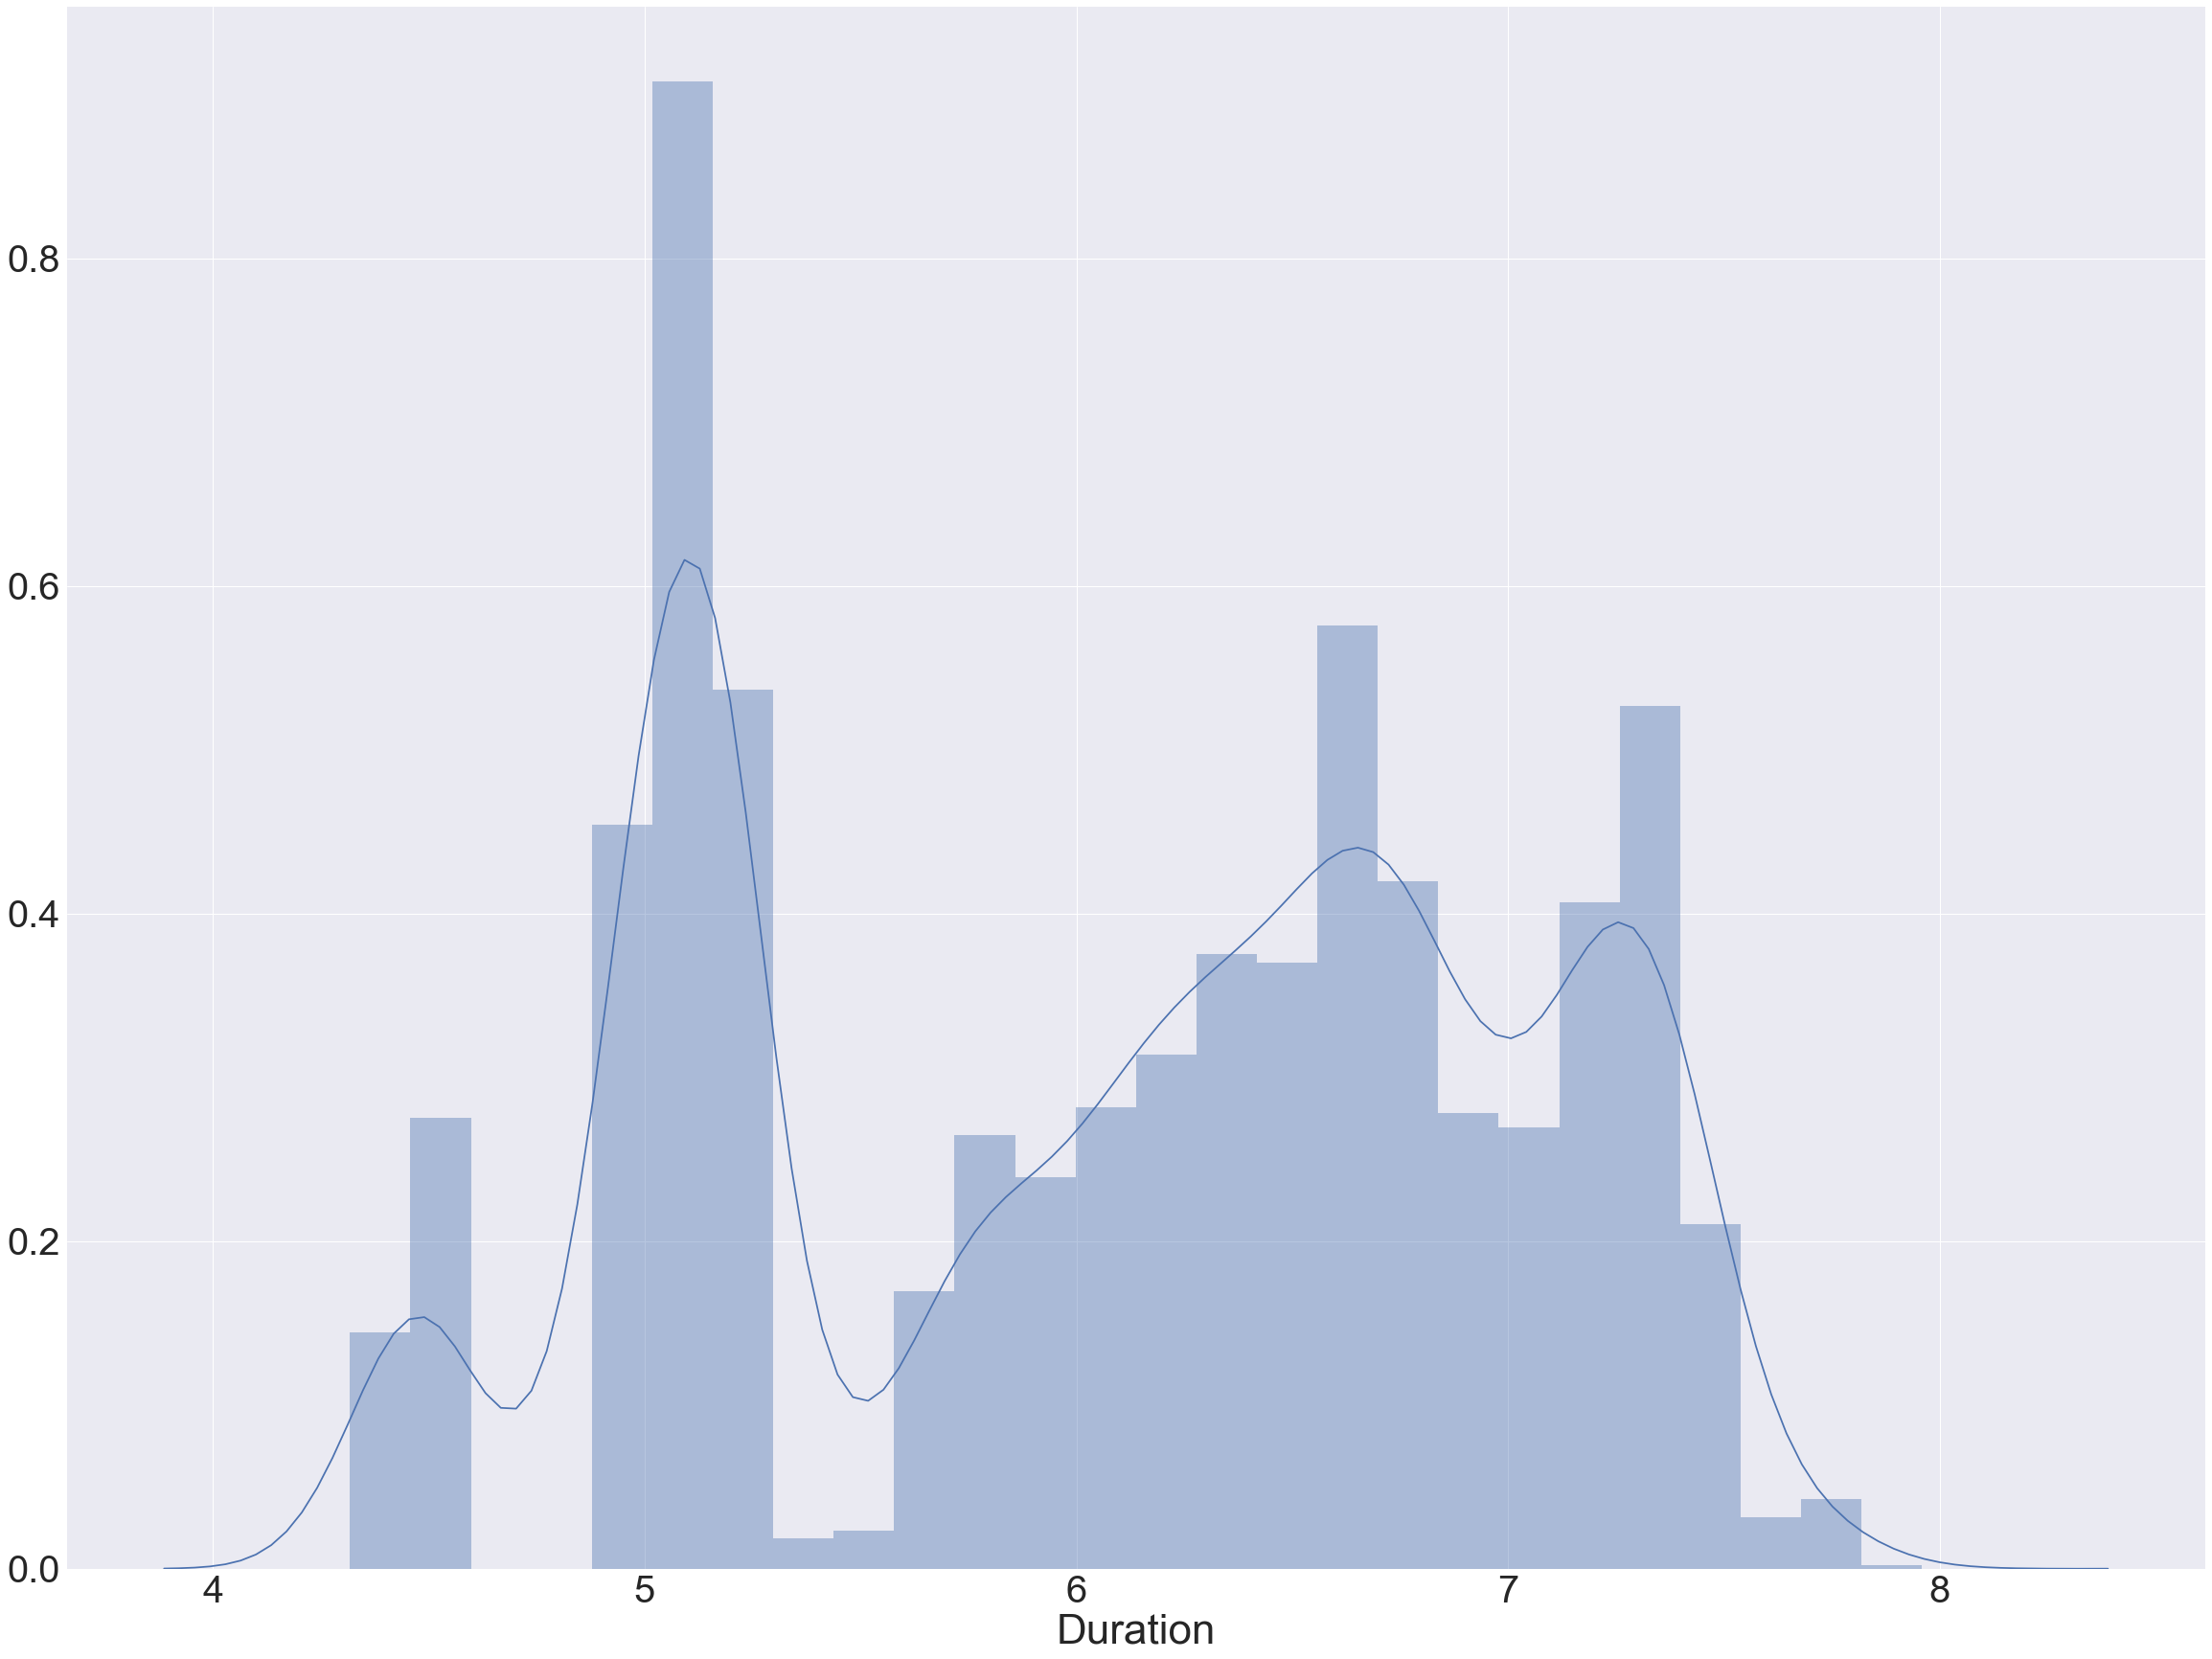

In [274]:
sns.distplot((raw_data['Duration']))
sns.set(rc={'figure.figsize':(40,30)})
sns.set(font_scale=4)   
plt.show()

In [275]:
len(raw_data[raw_data['Duration']>642])

0

In [276]:
len(raw_data)

13353

In [279]:
from sklearn.linear_model import LinearRegression

In [280]:
linear_regressor = LinearRegression()
linear_regressor.fit((train_x['Duration']).values.reshape(-1, 1), (train_y).values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [281]:
Y_pred = linear_regressor.predict((train_x['Duration']).values.reshape(-1, 1))  # make predictions

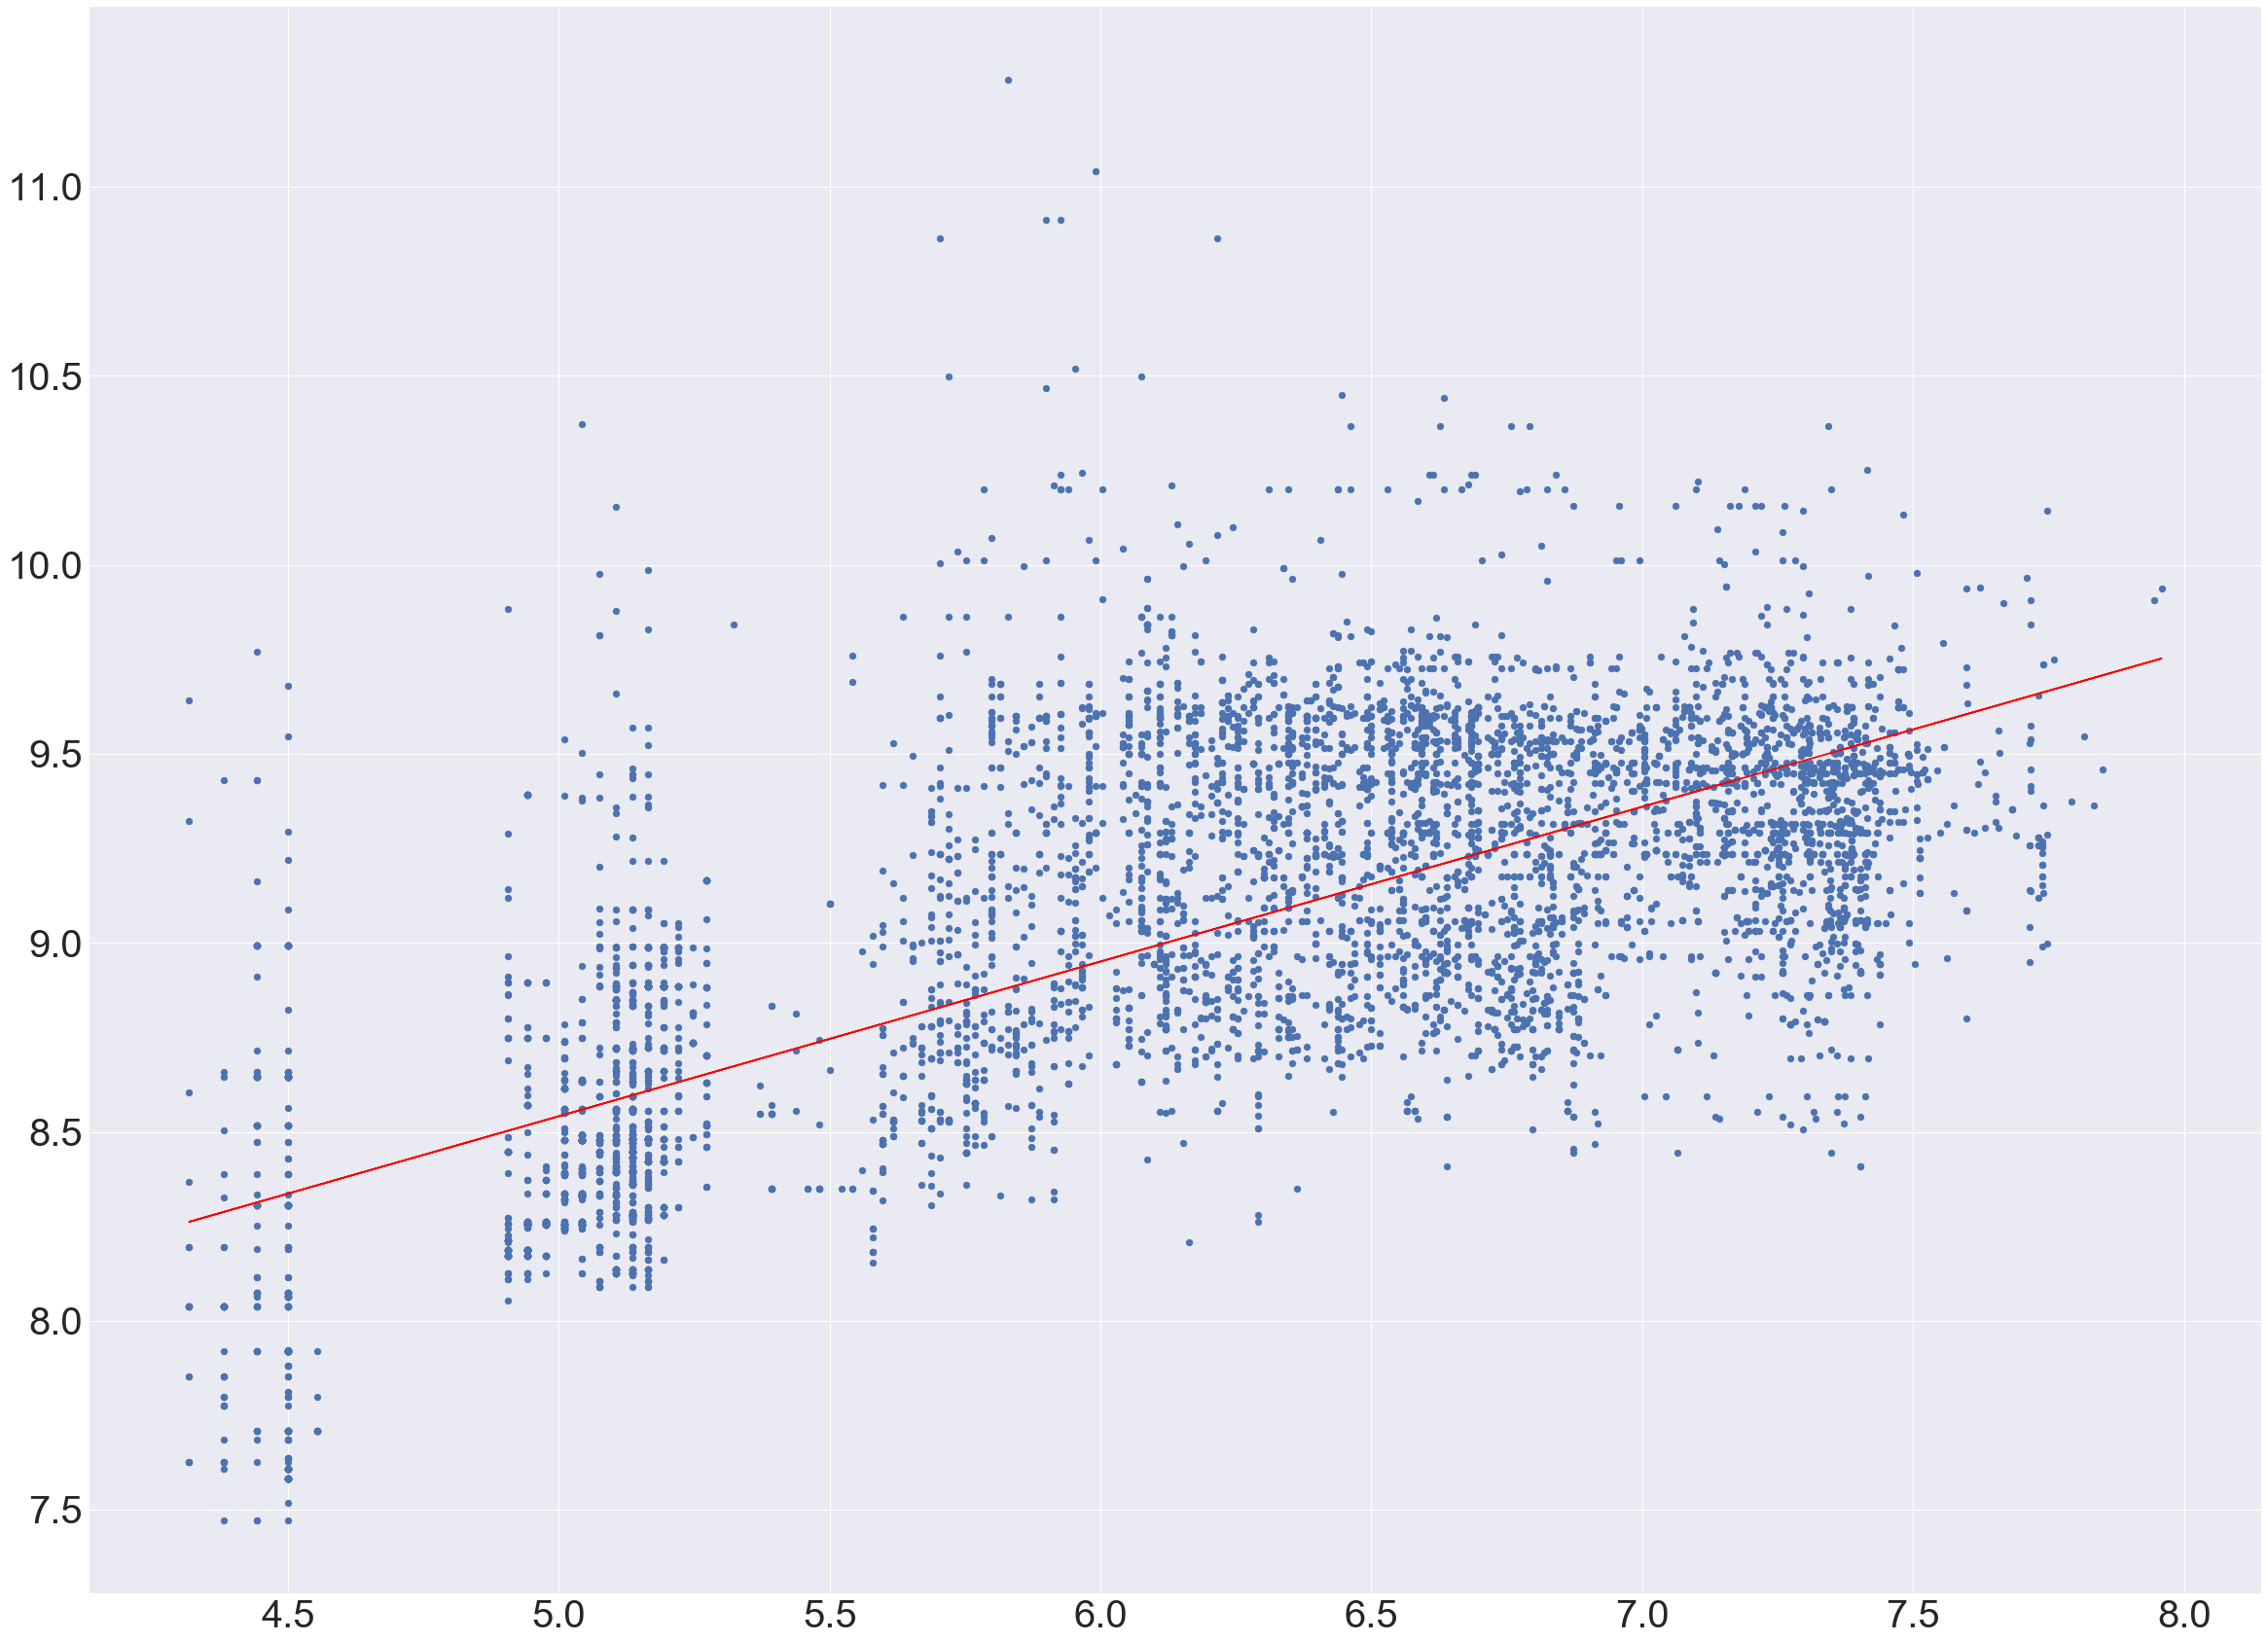

In [282]:
plt.scatter((train_x['Duration']).values.reshape(-1, 1), (train_y).values.reshape(-1, 1))
plt.plot((train_x['Duration']).values.reshape(-1, 1), Y_pred, color='red')
plt.show()

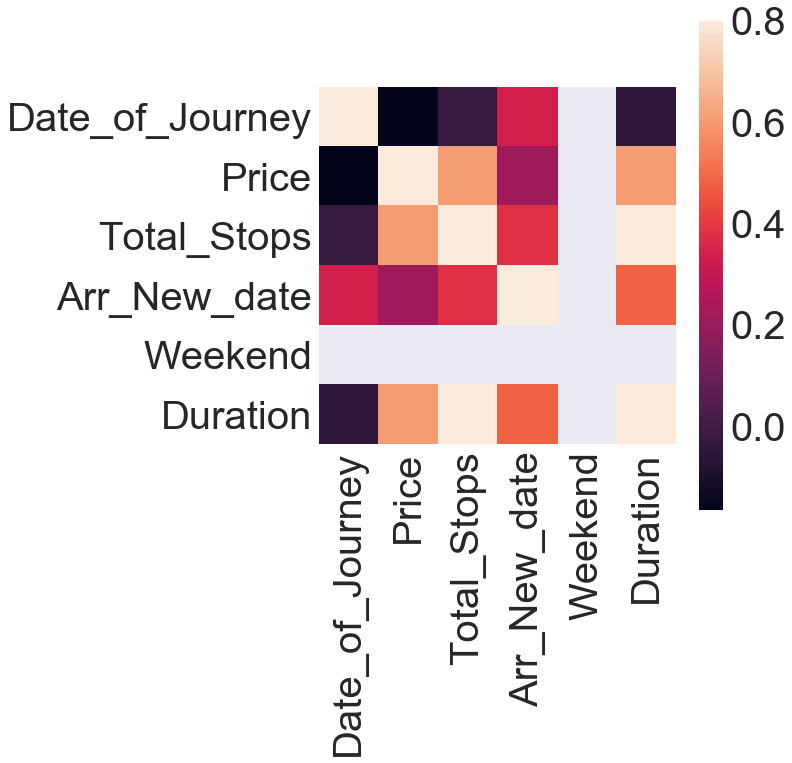

In [283]:
corrmat = raw_data[raw_data['source']=='train'].corr()
f, ax = plt.subplots(figsize=(8, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [284]:
raw_data[raw_data['source']=='train'].corr()

,Date_of_Journey,Price,Total_Stops,Arr_New_date,Weekend,Duration
Date_of_Journey,1.000000,-0.165541,-0.024131,0.334020,NaN,-0.043799
Price,-0.165541,1.000000,0.603944,0.217571,NaN,0.607099
Total_Stops,-0.024131,0.603944,1.000000,0.380713,NaN,0.829229
Arr_New_date,0.334020,0.217571,0.380713,1.000000,NaN,0.480546
Weekend,NaN,NaN,NaN,NaN,NaN,NaN
Duration,-0.043799,0.607099,0.829229,0.480546,NaN,1.000000


In [285]:
from sklearn.grid_search import GridSearchCV

In [286]:
RF_G= param_grid={
            'max_depth': [4,8,10,12,14,16],
            'n_estimators': [10,20,30,40,50],
            'min_samples_split': [2, 5, 10]
        },

In [287]:
gsearchRF1 = GridSearchCV(estimator = RandomForestRegressor(),param_grid=RF_G,scoring='neg_mean_squared_log_error')


In [288]:
gsearchRF1.fit(train_x,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=({'max_depth': [4, 8, 10, 12, 14, 16], 'n_estimators': [10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]},),
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_log_error', verbose=0)

In [289]:
gsearchRF1.best_params_

{'max_depth': 16, 'min_samples_split': 10, 'n_estimators': 50}

In [290]:
Rf = RandomForestRegressor(max_depth=12,n_estimators=30)

In [291]:
Rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [292]:
sub3 = Rf.predict(Y)

In [293]:
sub3 = np.exp(sub3)
pd.DataFrame(sub3).to_excel("./subimission_07.xlsx")


# Submission 4 0.9126242

# SUBMISSION 5 0.9171955

# SUBMISSION 6 0.9173751

 # SUBMISSION 7 0.9175077

# SUBMISSION 8 0.9189178

# SUBMISSION 9 0.9191317

# SUBMISSION 10 0.9201230


In [306]:
RF_G_2= param_grid={
             'max_depth': [20,22,24,26,28,30],
            'n_estimators': [60,70,80,90,100,110],
            'min_samples_split': [10, 12, 15,17],
            'min_samples_leaf' : [1, 2,3],
             #'bootstrap':[True,False],
             #'max_features': ['auto', 'sqrt'],
        },

In [307]:
gsearchRF2 = GridSearchCV(estimator = RandomForestRegressor(),param_grid=RF_G_2,scoring='neg_mean_squared_log_error')


In [308]:
gsearchRF2.fit(train_x,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=({'max_depth': [20, 22, 24, 26, 28, 30], 'n_estimators': [60, 70, 80, 90, 100, 110], 'min_samples_split': [10, 12, 15, 17], 'min_samples_leaf': [1, 2, 3]},),
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_log_error', verbose=0)

In [309]:
gsearchRF2.best_params_

{'max_depth': 28,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 70}

In [315]:
Rf = RandomForestRegressor(max_depth=28,n_estimators=70,bootstrap=True,max_features='auto',min_samples_leaf=1,
                           min_samples_split=10)
# Rf = RandomForestRegressor(max_depth=16,n_estimators=50,bootstrap=True,max_features='auto',min_samples_leaf=1,
#                           min_samples_split=10)

In [311]:
Rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=28,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [300]:
sub6 = Rf.predict(Y)

In [301]:
#sub6 = np.exp(sub6)
#pd.DataFrame(sub6).to_excel("./subimission_10.xlsx")

In [316]:
fitmodel(Rf,train_x,train_y,valid_x,valid_y)
#0.1794362352582324

0.1797031417424683


In [303]:
Rf.feature_importances_

array([0.09052, 0.023  , 0.00608, 0.     , 0.66095, 0.00176, 0.00828, 0.00179, 0.01297, 0.00386, 0.06467,
       0.00141, 0.01506, 0.00647, 0.00002, 0.00772, 0.0055 , 0.00246, 0.00224, 0.00239, 0.00115, 0.00274,
       0.00129, 0.00133, 0.00184, 0.00482, 0.00159, 0.01496, 0.00136, 0.00843, 0.00159, 0.00233, 0.00245,
       0.00344, 0.00067, 0.00234, 0.0013 , 0.00122, 0.00117, 0.00148, 0.00919, 0.00284, 0.00263, 0.00294,
       0.00219, 0.00256, 0.00301])

In [304]:
from fastai.imports import*
from fastai.structured import *

In [305]:
rf_feat_importance(Rf, train_x)

,cols,imp
4,Duration,0.660948
0,Date_of_Journey,0.090520
10,Airline_Jet Airways,0.064670
1,Total_Stops,0.022996
12,Airline_Multiple carriers,0.015061
27,DOJ_Month_1,0.014965
8,Airline_IndiGo,0.012974
40,Dep_hour_2,0.009191
29,DOJ_Month_3,0.008430
6,Airline_Air India,0.008277


In [318]:
raw_data1.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,train


In [319]:
train.head(3)

,Airline,Date_of_Journey,Destination,Price,Source,Total_Stops,DOJ_Month,Arr_New_date,Arr_Month,Weekend,Duration,Dep_hour,Arr_hour
0,IndiGo,24,New Delhi,8.267962,Banglore,0.0,3,22,Mar,False,5.135798,4,1
1,Air India,5,Banglore,8.944028,Kolkata,2.0,1,0,XXX,False,6.098074,1,3
2,Jet Airways,6,Cochin,9.538348,Delhi,2.0,9,10,Jun,False,7.038784,2,1
